***overview of the steps the code will perform:***


1.   Install necessary libraries and import required modules.
1.   Download and unzip the dataset.
1.   Define the display_top5_predictions function to display top-5 predictions for randomly selected images from a given dataset.
1.   Define data pre-processing using torchvision transforms.
1.   Load the dataset using the ImageFolder function for the train, validation, and test datasets.
1.   Perform a grid search for hyperparameters by iterating through different combinations of batch sizes, learning rates, optimizers, and loss functions.
1.   Instantiate the model (ResNet34), optimizer, and loss function for the current configuration.
1.   Train the model for the specified number of epochs.
1.   Define the evaluate function to calculate the accuracy of the model on a given dataset.
1.   Calculate the validation and test accuracies.
1.   Define the topk_accuracy function to calculate top-1 and top-5 accuracies for a given dataset.
1.   Calculate top-1 and top-5 accuracies for the validation and test datasets.
1.   Define the get_predictions and get_images_predictions functions to get true labels and predictions for a given dataset.
1.   Get true labels and predictions for the validation and test datasets.
1.   Calculate confusion matrices for the validation and test datasets.
1.   Define the display_confusion_matrix function to display the confusion matrix.
1.   Display top-5 predictions for randomly selected images from the validation and test datasets.
1.   Display confusion matrices for the validation and test datasets.
1.   Save the trained model.
1.   Download the saved model file to your local machine. 
1.   Download the saved model file to your local machine.






In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import random
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from torch.utils.tensorboard import SummaryWriter
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
class Places2Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.categories = []
        self.images = []
        self.labels = []
        
        for root, dirs, files in os.walk(root_dir):
            if not dirs:
                category_name = os.path.basename(root)
                if category_name not in self.categories:
                    self.categories.append(category_name)
                category_idx = self.categories.index(category_name)
                for image_file in files:
                    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.images.append(os.path.join(root, image_file))
                        self.labels.append(category_idx)
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Transformations to apply on the images
#Resize images to 224x224 pixels:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #Data augmentation techniques:
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
!unzip -o "/content/drive/MyDrive/Places2_simp.zip" -d "/content/"
!unzip -o "/content/drive/MyDrive/testset.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Places2_simp/phone_booth/00000513.jpg  
  inflating: /content/Places2_simp/phone_booth/00000275.jpg  
  inflating: /content/Places2_simp/phone_booth/00000922.jpg  
  inflating: /content/Places2_simp/phone_booth/00000088.jpg  
  inflating: /content/Places2_simp/phone_booth/00000936.jpg  
  inflating: /content/Places2_simp/phone_booth/00000739.jpg  
  inflating: /content/Places2_simp/phone_booth/00000705.jpg  
  inflating: /content/Places2_simp/phone_booth/00000063.jpg  
  inflating: /content/Places2_simp/phone_booth/00000077.jpg  
  inflating: /content/Places2_simp/phone_booth/00000711.jpg  
  inflating: /content/Places2_simp/phone_booth/00000856.jpg  
  inflating: /content/Places2_simp/phone_booth/00000842.jpg  
  inflating: /content/Places2_simp/phone_booth/00000895.jpg  
  inflating: /content/Places2_simp/phone_booth/00000881.jpg  
  inflating: /content/Places2_simp/phone_booth/00000659.jpg  
  inflating: /conte

In [ ]:
# Define the dataset and dataloader, change the root_dir to the path of the dataset
dataset = Places2Dataset(root_dir='/content/Places2_simp', transform=transform)

# this is the dataset you collected
new_dataset = Places2Dataset(root_dir='/content/testset', transform=transform)

# Print the number of images in both datasets
print("Number of images in the dataset: {}".format(len(dataset)))
print("Number of images in the new dataset: {}".format(len(new_dataset)))


Number of images in the dataset: 40000
Number of images in the new dataset: 436


In [ ]:
full_dataset = Places2Dataset(root_dir='/content/Places2_simp', transform=transform)
print(f"Number of samples in the full dataset: {len(full_dataset)}")


Number of samples in the full dataset: 40000


In [ ]:

# Define the size of train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Randomly split the dataset into train and test sets
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create dataloaders for training and testing sets
# you can fine tune the batch_size 
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Create dataloader for new dataset
new_dataloader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# note: The shuffle argument is set to True for the training dataloader, 
# which randomly shuffles the training images at the beginning of each epoch. 
# The shuffle argument is set to False for the testing dataloader 
# to preserve the order of the testing images.


In [ ]:
# Define the size of train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Randomly split the dataset into train and test sets
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create dataloaders for training and testing 

# you can fine tune the batch_size
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Create dataloader for new dataset
new_dataloader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# note: The shuffle argument is set to True for the training dataloader, 
# which randomly shuffles the training images at the beginning of each epoch. 
# The shuffle argument is set to False for the testing dataloader 
# to preserve the order of the testing images.


higher learning rate for the early layers of the model, since these layers are closer to the input data and may need to be updated more quickly to adapt to our dataset.A lower learning rate for the later layers of the model (layer3, layer4, and fc), since these layers are closer to the output of the model and may need to be updated more slowly to preserve the useful features learned by the pre-trained ResNet-34 model.



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the models, you can uncomment one of the following lines to use a different model 
#model = torchvision.models.resnet34()
#model = torchvision.models.resnet50()
model = torchvision.models.resnet18()

# Modify the last layer to match the number of categories in our dataset
num_classes = len(dataset.categories)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Specify different learning rates for different layers of the model
learning_rates = [{'params': model.conv1.parameters(), 'lr': 0.001},
                  {'params': model.layer1.parameters(), 'lr': 0.001},
                  {'params': model.layer2.parameters(), 'lr': 0.001},
                  {'params': model.layer3.parameters(), 'lr': 0.0001},
                  {'params': model.layer4.parameters(), 'lr': 0.0001},
                  {'params': model.fc.parameters(), 'lr': 0.001}]

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(learning_rates, lr=0.001, momentum=0.9)

model = model.to(device)

# Create a SummaryWriter object to write the log files for TensorBoard
writer = SummaryWriter()

In [ ]:
# Modify the last layer to match the number of categories in your dataset
num_classes = len(dataset.categories)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Specify different learning rates for different layers of the model
learning_rates = [{'params': model.conv1.parameters(), 'lr': 0.001},
                  {'params': model.layer1.parameters(), 'lr': 0.001},
                  {'params': model.layer2.parameters(), 'lr': 0.001},
                  {'params': model.layer3.parameters(), 'lr': 0.0001},
                  {'params': model.layer4.parameters(), 'lr': 0.0001},
                  {'params': model.fc.parameters(), 'lr': 0.001}]

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(learning_rates, lr=0.001, momentum=0.9)

model = model.to(device)

# Define the number of epochs to train for
num_epochs = 1

# Create a SummaryWriter object to write the log files for TensorBoard
writer = SummaryWriter()

In [ ]:
import os

if top1_acc > best_acc:
    if os.path.exists('resnet50_bz32.pt'):
        os.remove('resnet50_bz32.pt')
    best_acc = top1_acc
    torch.save(model.state_dict(), 'resnet50_bz32.pt')


NameError: ignored

In [ ]:
best_acc = 0
best_epoch = 0

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
       ## loss = criterion(outputs, labels.cuda()) this is on nvidia 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            writer.add_scalar('training loss', running_loss / 10, epoch * len(train_dataloader) + i)
            print('Epoch #{} Batch #{} Loss: {:.4f}'.format(epoch + 1, i+1, running_loss / 10))
            running_loss = 0.0
        
    print('Finished Training Epoch #{}'.format(epoch + 1))

    print("Testing the model: ")
    # Set the model to evaluation mode
    model.eval()

    # Initialize counters for the top-1 and top-5 accuracies
    top1_correct = 0
    top5_correct = 0
    total = 0

    # Initialize the confusion matrix
    conf_matrix = torch.zeros(num_classes, num_classes)

    # Iterate over the validation set
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

            # Update the top-1 and top-5 accuracy counters
            top1_correct += torch.sum(preds == labels.data)
            for i in range(labels.size(0)):
                if labels[i] in top5_preds[i]:
                    top5_correct += 1

            # Update the confusion matrix
            conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))
            total += labels.size(0)


    # Calculate the top-1 and top-5 accuracy
    top1_acc = float(top1_correct) / total * 100
    top5_acc = float(top5_correct) / total * 100

    writer.add_scalar('top1_accuracy', top1_acc, epoch)
    writer.add_scalar('top5_accuracy', top5_acc, epoch)

    print('Top-1 accuracy: {:.4f}'.format(top1_acc))
    print('Top-5 accuracy: {:.4f}'.format(top5_acc))
    
    # save the model if the top-1 accuracy is greater than the previous best accuracy and delete the previous model
    if top1_acc > best_acc:
        os.remove('resnet50_bz32.pt')
        best_acc = top1_acc
        torch.save(model.state_dict(), 'resnet50_bz32.pt')

# Save the last epoch model
torch.save(model.state_dict(), 'resnet50_bz32.pt')

Epoch #1 Batch #10 Loss: 3.7761
Epoch #1 Batch #20 Loss: 3.7071
Epoch #1 Batch #30 Loss: 3.7039


KeyboardInterrupt: ignored

In [ ]:
# Set the path to your Google Drive folder where you want to save the model
save_path = "/content/drive/MyDrive/model.pth"

# Save the trained model
torch.save(model.state_dict(), save_path)

In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/Copy of RUN4 (1).pth')
print(checkpoint.keys())


odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [ ]:
def load_checkpoint(filepath, model, optimizer):
    checkpoint = torch.load(filepath)
    model.load_state_dict(checkpoint['/content/drive/MyDrive/Copy of RUN4 (1).pth'])  # Updated key
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    best_acc = checkpoint['best_acc']
    
    return model, optimizer, epoch, best_acc


In [ ]:
def load_checkpoint(filepath, model):
    state_dict = torch.load(filepath)
    model.load_state_dict(state_dict)
    
    return model

model = load_checkpoint('/content/drive/MyDrive/Copy of RUN4 (1).pth', model)


RuntimeError: ignored

In [ ]:
best_acc = 0
best_epoch = 0

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
       ## loss = criterion(outputs, labels.cuda()) this is on nvidia 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            writer.add_scalar('training loss', running_loss / 10, epoch * len(train_dataloader) + i)
            print('Epoch #{} Batch #{} Loss: {:.4f}'.format(epoch + 1, i+1, running_loss / 10))
            running_loss = 0.0
        
    print('Finished Training Epoch #{}'.format(epoch + 1))

    print("Testing the model: ")
    # Set the model to evaluation mode
    model.eval()

    # Initialize counters for the top-1 and top-5 accuracies
    top1_correct = 0
    top5_correct = 0
    total = 0

    # Initialize the confusion matrix
    conf_matrix = torch.zeros(num_classes, num_classes)

    # Iterate over the validation set
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

            # Update the top-1 and top-5 accuracy counters
            top1_correct += torch.sum(preds == labels.data)
            for i in range(labels.size(0)):
                if labels[i] in top5_preds[i]:
                    top5_correct += 1

            # Update the confusion matrix
            conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))
            total += labels.size(0)


    # Calculate the top-1 and top-5 accuracy
    top1_acc = float(top1_correct) / total * 100
    top5_acc = float(top5_correct) / total * 100

    writer.add_scalar('top1_accuracy', top1_acc, epoch)
    writer.add_scalar('top5_accuracy', top5_acc, epoch)

    print('Top-1 accuracy: {:.4f}'.format(top1_acc))
    print('Top-5 accuracy: {:.4f}'.format(top5_acc))
    
    # save the model if the top-1 accuracy is greater than the previous best accuracy and delete the previous model
    if top1_acc > best_acc:
        os.remove('resnet50_bz32.pt')
        best_acc = top1_acc
        torch.save(model.state_dict(), 'resnet50_bz32.pt')

# Save the last epoch model
torch.save(model.state_dict(), 'resnet50_bz32.pt')

Epoch #1 Batch #10 Loss: 3.6595
Epoch #1 Batch #20 Loss: 3.6049
Epoch #1 Batch #30 Loss: 3.5178
Epoch #1 Batch #40 Loss: 3.2997
Epoch #1 Batch #50 Loss: 3.2369
Epoch #1 Batch #60 Loss: 3.0058
Epoch #1 Batch #70 Loss: 2.9036
Epoch #1 Batch #80 Loss: 2.7893
Epoch #1 Batch #90 Loss: 2.8317
Epoch #1 Batch #100 Loss: 2.7169
Epoch #1 Batch #110 Loss: 2.6622
Epoch #1 Batch #120 Loss: 2.6677
Epoch #1 Batch #130 Loss: 2.6193
Epoch #1 Batch #140 Loss: 2.5181
Epoch #1 Batch #150 Loss: 2.6950
Epoch #1 Batch #160 Loss: 2.4715
Epoch #1 Batch #170 Loss: 2.5884
Epoch #1 Batch #180 Loss: 2.3438
Epoch #1 Batch #190 Loss: 2.4817
Epoch #1 Batch #200 Loss: 2.4682
Epoch #1 Batch #210 Loss: 2.4324
Epoch #1 Batch #220 Loss: 2.4330
Epoch #1 Batch #230 Loss: 2.3494
Epoch #1 Batch #240 Loss: 2.3959
Epoch #1 Batch #250 Loss: 2.3679
Epoch #1 Batch #260 Loss: 2.4483
Epoch #1 Batch #270 Loss: 2.3937
Epoch #1 Batch #280 Loss: 2.3925
Epoch #1 Batch #290 Loss: 2.3640
Epoch #1 Batch #300 Loss: 2.3686
Epoch #1 Batch #310

In [ ]:
best_acc = 0
best_epoch = 0

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
       ## loss = criterion(outputs, labels.cuda()) this is on nvidia 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            writer.add_scalar('training loss', running_loss / 10, epoch * len(train_dataloader) + i)
            print('Epoch #{} Batch #{} Loss: {:.4f}'.format(epoch + 1, i+1, running_loss / 10))
            running_loss = 0.0
        
    print('Finished Training Epoch #{}'.format(epoch + 1))

    print("Testing the model: ")
    # Set the model to evaluation mode
    model.eval()

    # Initialize counters for the top-1 and top-5 accuracies
    top1_correct = 0
    top5_correct = 0
    total = 0

    # Initialize the confusion matrix
    conf_matrix = torch.zeros(num_classes, num_classes)

    # Iterate over the validation set
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

            # Update the top-1 and top-5 accuracy counters
            top1_correct += torch.sum(preds == labels.data)
            for i in range(labels.size(0)):
                if labels[i] in top5_preds[i]:
                    top5_correct += 1

            # Update the confusion matrix
            conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))
            total += labels.size(0)


    # Calculate the top-1 and top-5 accuracy
    top1_acc = float(top1_correct) / total * 100
    top5_acc = float(top5_correct) / total * 100

    writer.add_scalar('top1_accuracy', top1_acc, epoch)
    writer.add_scalar('top5_accuracy', top5_acc, epoch)

    print('Top-1 accuracy: {:.4f}'.format(top1_acc))
    print('Top-5 accuracy: {:.4f}'.format(top5_acc))
    
    # save the model if the top-1 accuracy is greater than the previous best accuracy and delete the previous model
    if top1_acc > best_acc:
        os.remove('resnet50_bz32.pt')
        best_acc = top1_acc
        torch.save(model.state_dict(), 'resnet50_bz32.pt')

# Save the last epoch model
torch.save(model.state_dict(), 'resnet50_bz32.pt')

Epoch #1 Batch #10 Loss: 1.8681
Epoch #1 Batch #20 Loss: 1.7655
Epoch #1 Batch #30 Loss: 1.6820
Epoch #1 Batch #40 Loss: 1.7279
Epoch #1 Batch #50 Loss: 1.6334
Epoch #1 Batch #60 Loss: 1.6614
Epoch #1 Batch #70 Loss: 1.8247
Epoch #1 Batch #80 Loss: 1.7038
Epoch #1 Batch #90 Loss: 1.7560
Epoch #1 Batch #100 Loss: 1.6578
Epoch #1 Batch #110 Loss: 1.6803
Epoch #1 Batch #120 Loss: 1.6886
Epoch #1 Batch #130 Loss: 1.7262
Epoch #1 Batch #140 Loss: 1.7143
Epoch #1 Batch #150 Loss: 1.7679
Epoch #1 Batch #160 Loss: 1.7434
Epoch #1 Batch #170 Loss: 1.7001
Epoch #1 Batch #180 Loss: 1.7798
Epoch #1 Batch #190 Loss: 1.7065
Epoch #1 Batch #200 Loss: 1.7151
Epoch #1 Batch #210 Loss: 1.7712
Epoch #1 Batch #220 Loss: 1.7103
Epoch #1 Batch #230 Loss: 1.7569
Epoch #1 Batch #240 Loss: 1.8169
Epoch #1 Batch #250 Loss: 1.7137
Epoch #1 Batch #260 Loss: 1.8538
Epoch #1 Batch #270 Loss: 1.6288
Epoch #1 Batch #280 Loss: 1.8215
Epoch #1 Batch #290 Loss: 1.6903
Epoch #1 Batch #300 Loss: 1.7620
Epoch #1 Batch #310

In [ ]:
best_acc = 0
best_epoch = 0

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
       ## loss = criterion(outputs, labels.cuda()) this is on nvidia 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            writer.add_scalar('training loss', running_loss / 10, epoch * len(train_dataloader) + i)
            print('Epoch #{} Batch #{} Loss: {:.4f}'.format(epoch + 1, i+1, running_loss / 10))
            running_loss = 0.0
        
    print('Finished Training Epoch #{}'.format(epoch + 1))

    print("Testing the model: ")
    # Set the model to evaluation mode
    model.eval()

    # Initialize counters for the top-1 and top-5 accuracies
    top1_correct = 0
    top5_correct = 0
    total = 0

    # Initialize the confusion matrix
    conf_matrix = torch.zeros(num_classes, num_classes)

    # Iterate over the validation set
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

            # Update the top-1 and top-5 accuracy counters
            top1_correct += torch.sum(preds == labels.data)
            for i in range(labels.size(0)):
                if labels[i] in top5_preds[i]:
                    top5_correct += 1

            # Update the confusion matrix
            conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))
            total += labels.size(0)


    # Calculate the top-1 and top-5 accuracy
    top1_acc = float(top1_correct) / total * 100
    top5_acc = float(top5_correct) / total * 100

    writer.add_scalar('top1_accuracy', top1_acc, epoch)
    writer.add_scalar('top5_accuracy', top5_acc, epoch)

    print('Top-1 accuracy: {:.4f}'.format(top1_acc))
    print('Top-5 accuracy: {:.4f}'.format(top5_acc))
    
    # save the model if the top-1 accuracy is greater than the previous best accuracy and delete the previous model
    if top1_acc > best_acc:
        os.remove('resnet50_bz32.pt')
        best_acc = top1_acc
        torch.save(model.state_dict(), 'resnet50_bz32.pt')

# Save the last epoch model
torch.save(model.state_dict(), 'resnet50_bz32.pt')

Epoch #1 Batch #10 Loss: 1.5576
Epoch #1 Batch #20 Loss: 1.2639
Epoch #1 Batch #30 Loss: 1.4851
Epoch #1 Batch #40 Loss: 1.4403
Epoch #1 Batch #50 Loss: 1.6427
Epoch #1 Batch #60 Loss: 1.5634
Epoch #1 Batch #70 Loss: 1.6263
Epoch #1 Batch #80 Loss: 1.4084
Epoch #1 Batch #90 Loss: 1.4824
Epoch #1 Batch #100 Loss: 1.4680
Epoch #1 Batch #110 Loss: 1.5894
Epoch #1 Batch #120 Loss: 1.5072
Epoch #1 Batch #130 Loss: 1.3522
Epoch #1 Batch #140 Loss: 1.4910
Epoch #1 Batch #150 Loss: 1.5722
Epoch #1 Batch #160 Loss: 1.5649
Epoch #1 Batch #170 Loss: 1.5289
Epoch #1 Batch #180 Loss: 1.5830
Epoch #1 Batch #190 Loss: 1.6715
Epoch #1 Batch #200 Loss: 1.5149
Epoch #1 Batch #210 Loss: 1.4629
Epoch #1 Batch #220 Loss: 1.6834
Epoch #1 Batch #230 Loss: 1.6211
Epoch #1 Batch #240 Loss: 1.6129
Epoch #1 Batch #250 Loss: 1.5042
Epoch #1 Batch #260 Loss: 1.5750
Epoch #1 Batch #270 Loss: 1.5655
Epoch #1 Batch #280 Loss: 1.5789
Epoch #1 Batch #290 Loss: 1.5807
Epoch #1 Batch #300 Loss: 1.5091
Epoch #1 Batch #310

In [ ]:
best_acc = 0
best_epoch = 0

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
       ## loss = criterion(outputs, labels.cuda()) this is on nvidia 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            writer.add_scalar('training loss', running_loss / 10, epoch * len(train_dataloader) + i)
            print('Epoch #{} Batch #{} Loss: {:.4f}'.format(epoch + 1, i+1, running_loss / 10))
            running_loss = 0.0
        
    print('Finished Training Epoch #{}'.format(epoch + 1))

    print("Testing the model: ")
    # Set the model to evaluation mode
    model.eval()

    # Initialize counters for the top-1 and top-5 accuracies
    top1_correct = 0
    top5_correct = 0
    total = 0

    # Initialize the confusion matrix
    conf_matrix = torch.zeros(num_classes, num_classes)

    # Iterate over the validation set
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

            # Update the top-1 and top-5 accuracy counters
            top1_correct += torch.sum(preds == labels.data)
            for i in range(labels.size(0)):
                if labels[i] in top5_preds[i]:
                    top5_correct += 1

            # Update the confusion matrix
            conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))
            total += labels.size(0)


    # Calculate the top-1 and top-5 accuracy
    top1_acc = float(top1_correct) / total * 100
    top5_acc = float(top5_correct) / total * 100

    writer.add_scalar('top1_accuracy', top1_acc, epoch)
    writer.add_scalar('top5_accuracy', top5_acc, epoch)

    print('Top-1 accuracy: {:.4f}'.format(top1_acc))
    print('Top-5 accuracy: {:.4f}'.format(top5_acc))
    
    # save the model if the top-1 accuracy is greater than the previous best accuracy and delete the previous model
    if top1_acc > best_acc:
        os.remove('resnet50_bz32.pt')
        best_acc = top1_acc
        torch.save(model.state_dict(), 'resnet50_bz32.pt')
import os

if top1_acc > best_acc:
    if os.path.exists('resnet50_bz32.pt'):
        os.remove('resnet50_bz32.pt')
    best_acc = top1_acc
    torch.save(model.state_dict(), 'resnet50_bz32.pt')

# Save the last epoch model
torch.save(model.state_dict(), 'resnet50_bz32.pt')

Streaming output truncated to the last 5000 lines.
Epoch #22 Batch #960 Loss: 1.7718
Epoch #22 Batch #970 Loss: 1.6386
Epoch #22 Batch #980 Loss: 1.7900
Epoch #22 Batch #990 Loss: 1.8337
Epoch #22 Batch #1000 Loss: 1.5827
Finished Training Epoch #22
Testing the model: 
Top-1 accuracy: 45.2125
Top-5 accuracy: 77.9625
Epoch #23 Batch #10 Loss: 1.6045
Epoch #23 Batch #20 Loss: 1.6770
Epoch #23 Batch #30 Loss: 1.6788
Epoch #23 Batch #40 Loss: 1.5369
Epoch #23 Batch #50 Loss: 1.6775
Epoch #23 Batch #60 Loss: 1.5613
Epoch #23 Batch #70 Loss: 1.5936
Epoch #23 Batch #80 Loss: 1.6536
Epoch #23 Batch #90 Loss: 1.6326
Epoch #23 Batch #100 Loss: 1.7535
Epoch #23 Batch #110 Loss: 1.5957
Epoch #23 Batch #120 Loss: 1.6686
Epoch #23 Batch #130 Loss: 1.6528
Epoch #23 Batch #140 Loss: 1.6938
Epoch #23 Batch #150 Loss: 1.6951
Epoch #23 Batch #160 Loss: 1.5586
Epoch #23 Batch #170 Loss: 1.6834
Epoch #23 Batch #180 Loss: 1.7017
Epoch #23 Batch #190 Loss: 1.5534
Epoch #23 Batch #200 Loss: 1.7182
Epoch #23 B

In [ ]:
# Set the path to your Google Drive folder where you want to save the model
save_path = "/content/drive/MyDrive/model2.pth"

# Save the trained model
torch.save(model.state_dict(), save_path)

In [ ]:
def load_checkpoint(filepath, model):
    state_dict = torch.load(filepath)
    model.load_state_dict(state_dict)
    
    return model

model = load_checkpoint('/content/drive/MyDrive/model2.pth', model)


In [ ]:
# load the trained model
model.load_state_dict(torch.load('/content/drive/MyDrive/Copy of RUN4 (1).pth'))

# Set the model to evaluation mode
model.eval()

# Initialize counters for the top-1 and top-5 accuracies
top1_correct = 0
top5_correct = 0
total = 0

# Initialize the confusion matrix
conf_matrix = torch.zeros(num_classes, num_classes)

# Iterate over the validation set
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

        # Update the top-1 and top-5 accuracy counters
        top1_correct += torch.sum(preds == labels.data)
        for i in range(labels.size(0)):
            if labels[i] in top5_preds[i]:
                top5_correct += 1

        # Update the confusion matrix
        conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))

        total += labels.size(0)

# Calculate the top-1 and top-5 accuracy
top1_acc = float(top1_correct) / total * 100
top5_acc = float(top5_correct) / total * 100

print('Top-1 accuracy: {:.4f}'.format(top1_acc))
print('Top-5 accuracy: {:.4f}'.format(top5_acc))



RuntimeError: ignored

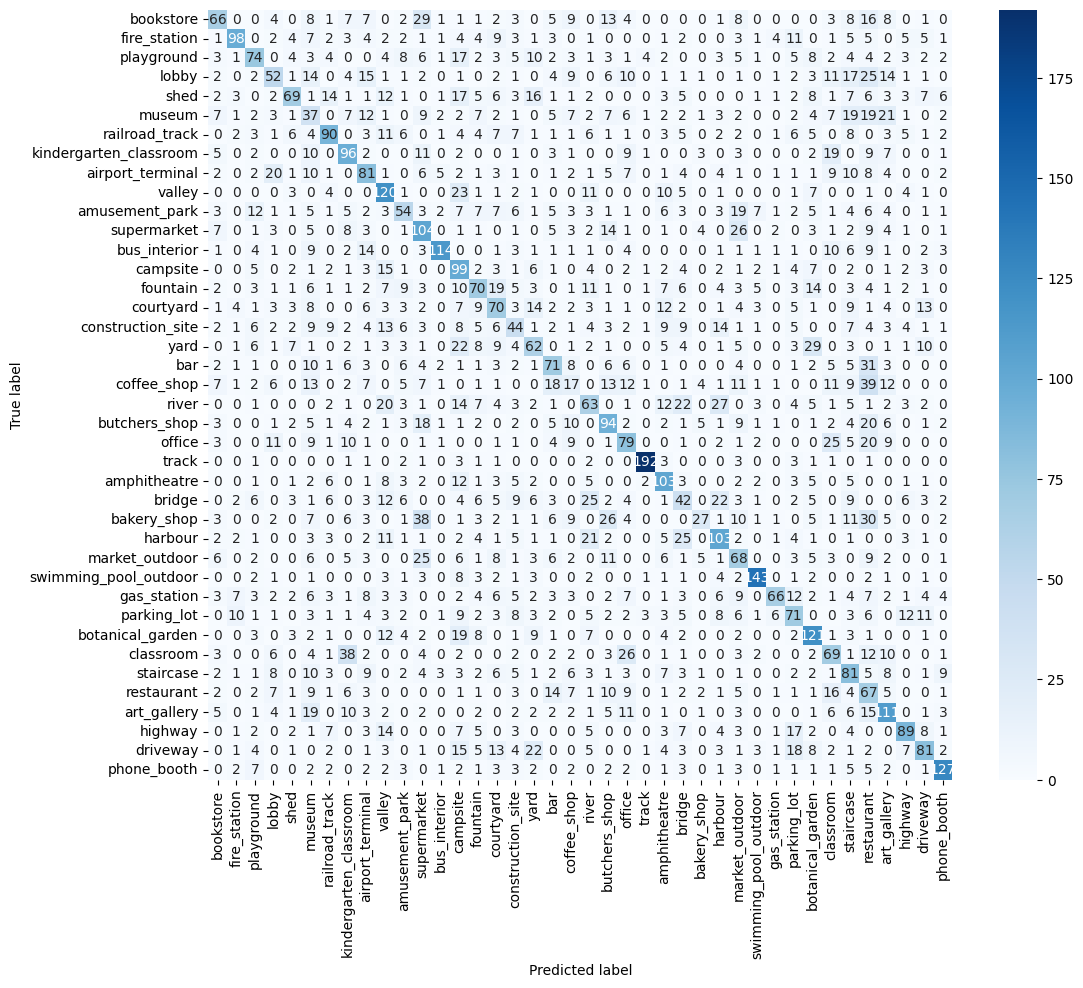

In [ ]:
# Plot the confusion matrix
class_names = dataset.categories
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix.numpy(), xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
def load_checkpoint(filepath, model):
    state_dict = torch.load(filepath)
    model.load_state_dict(state_dict)
    
    return model

model = load_checkpoint('/content/drive/MyDrive/model2.pth', model)


In [ ]:
from torchvision import datasets
# Define the batch size and the number of workers
batch_size = 32
num_workers = 2

# Load the test dataset
test_dataset = datasets.ImageFolder('/content/testset', transform=transform)

# Create a dataloader for the test dataset
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)




Testing on the new generated dataset

Top-1 accuracy: 3.8991
Top-5 accuracy: 14.9083


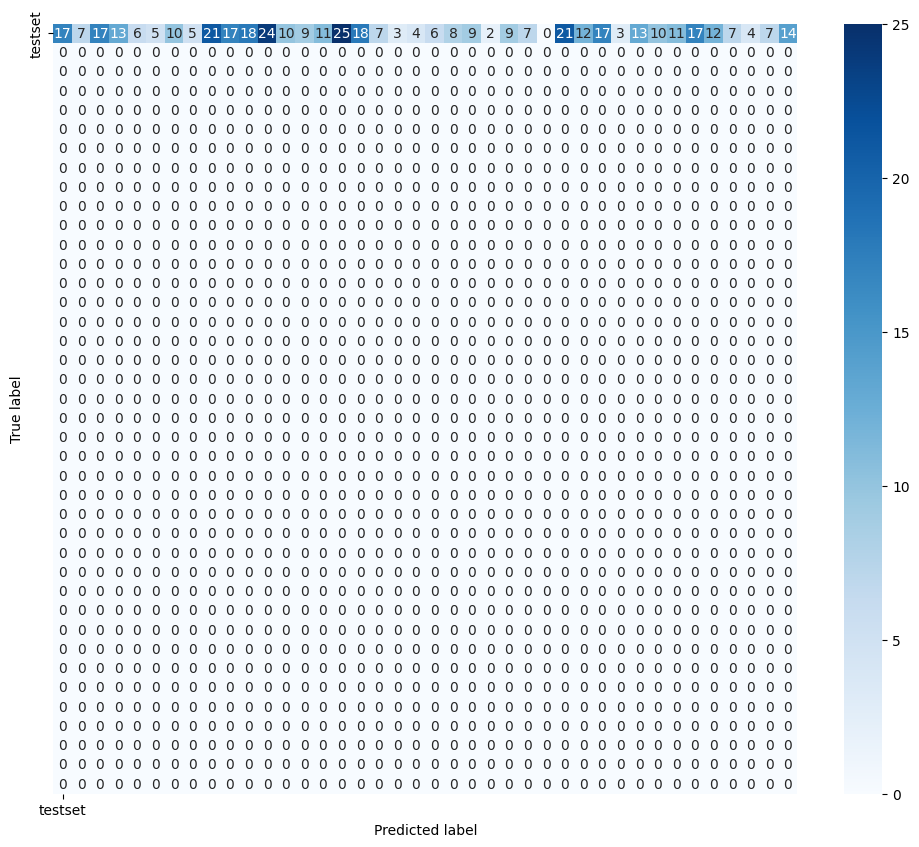

In [ ]:
# Initialize counters for the top-1 and top-5 accuracies
top1_correct = 0
top5_correct = 0
total = 0

# Initialize the confusion matrix
conf_matrix = torch.zeros(num_classes, num_classes)

# Iterate over the test set
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

        # Update the top-1 and top-5 accuracy counters
        top1_correct += torch.sum(preds == labels.data)
        for i in range(labels.size(0)):
            if labels[i] in top5_preds[i]:
                top5_correct += 1

        # Update the confusion matrix
        conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))

        total += labels.size(0)

# Calculate the top-1 and top-5 accuracy
top1_acc = float(top1_correct) / total * 100
top5_acc = float(top5_correct) / total * 100

print('Top-1 accuracy: {:.4f}'.format(top1_acc))
print('Top-5 accuracy: {:.4f}'.format(top5_acc))

# Plot the confusion matrix
class_names = test_dataset.classes
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix.numpy(), xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
